In [1]:
import pandas as pd

df = pd.read_csv("sample-data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df = df.rename(columns = {'Gender' : 'gender',
                          'Age' : 'age',
                          'Annual Income (k$)' : 'annual income',
                          'Spending Score (1-100)' : 'spending score'})
df.head()

,CustomerID,gender,age,annual income,spending score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df['gender'].replace(['Male', 'Female'], [0, 1], inplace = True)
df.head()

,CustomerID,gender,age,annual income,spending score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [4]:
from sklearn.cluster import KMeans

x = df.drop(['CustomerID', 'gender'], axis = 1)

clusters = []
for i in range(1, 11): 
    km = KMeans(n_clusters = i).fit(x)
    clusters.append(km.inertia_)

c:\Users\Vian Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vian Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Vian Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vian Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

Text(0, 0.5, 'Inertia')

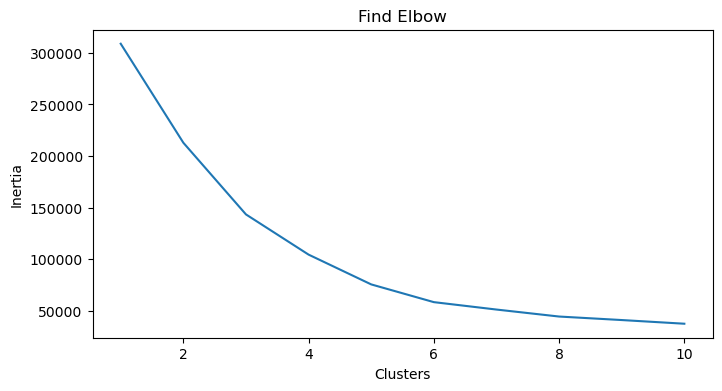

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib  inline

fig, ax = plt.subplots(figsize = (8, 4))
sns.lineplot(x = list(range(1, 11)), y = clusters, ax = ax)
ax.set_title ( 'Find Elbow' )
ax.set_xlabel ( 'Clusters' )
ax.set_ylabel ( 'Inertia' )

c:\Users\Vian Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vian Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


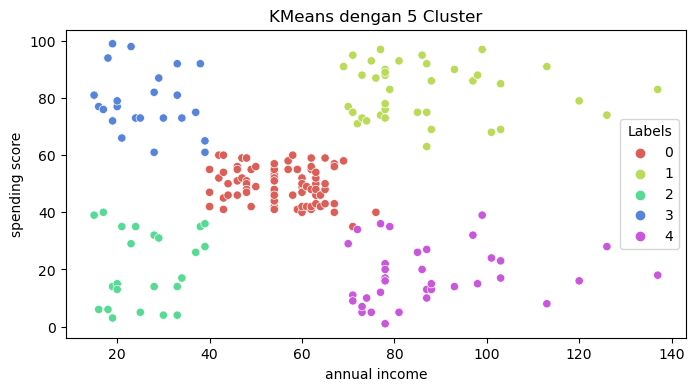

In [8]:
km5 = KMeans(n_clusters = 5).fit(x)

x['Labels'] = km5.labels_

plt.figure(figsize = (8,4))

sns.scatterplot(x = x['annual income'], y = x['spending score'], hue = x['Labels'],
                palette = sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()